# Using FGD 🎨 🖼 #

In [1]:
from diffusionModel import diffusionModel
from FGD import FGD
from PIL import Image

[Taichi] version 1.7.1, llvm 15.0.4, commit 0f143b2f, linux, python 3.10.0


[I 08/14/24 18:01:18.615 3401808] [shell.py:_shell_pop_print@23] Graphical python shell detected, using wrapped sys.stdout


[Taichi] Starting on arch=cuda


**Step 1:** Initalize the diffusion model which requires setting the initial latents (randomly initalized based on a seed for reproducibility) and the text prompt. 

In the following example, we initialize a stable diffusion model to generate images of <em>"a cat in a red hat"</em>.

In [2]:
model = diffusionModel(scheduler='ddpm', version='1.4', use_ema=True)
model.initialize_latents_random(1)
model.set_prompt("a cat in a red hat")
print(model)

{
  "prompt": "a cat in a red hat",
  "version": "1.4",
  "use_ema": true,
  "scheduler": "ddpm",
  "initialization": 1
}


**Step 2:** Initalize the filter for FGD which requires specifying the guide image as a file path, and optionally specifying the detail, cross bilateral sigma paramters, $t_{end}$, and number of normalization steps in the constructor:
```
filter = FGD(model, guide_image=guide_image, detail=detail, sigmas=sigmas, tend=tend, norm_steps=norm_steps)
```
To adjust FGD parameters after initalization, you can directly modify the class variables of the FGD instance. This is preferable when adjusting everything except the bilateral filter sigmas as this avoids having to recompute the bilateral matrix. Note, every time the sigmas need to be changed, the cross bilateral matrix needs to be re-computed which is combined into a single class method: 
```
set_bilateral_matrix(self, sigmas) 
```
where sigmas is a list consisting of either three entries [$\sigma_{spatial~x}$, $\sigma_{spatial~y}$, $\sigma_{value}$] or just two entries [$\sigma_{spatial}$, $\sigma_{value}$]. The latter assumes a spatially symetric kernel where $\sigma_{spatial~x}$ = $\sigma_{spatial~y}$ which was done for all experiments and results shown in the paper. 

In the following example, we initialize a filter with the default values, print our filter parameters, and display the guide image. 


{
  "guide image": "imgs/red_hat.jpg",
  "detail": 1.2,
  "sigmas": [
    3.0,
    3.0,
    0.3
  ],
  "t_end": 15,
  "norm steps": 0
}


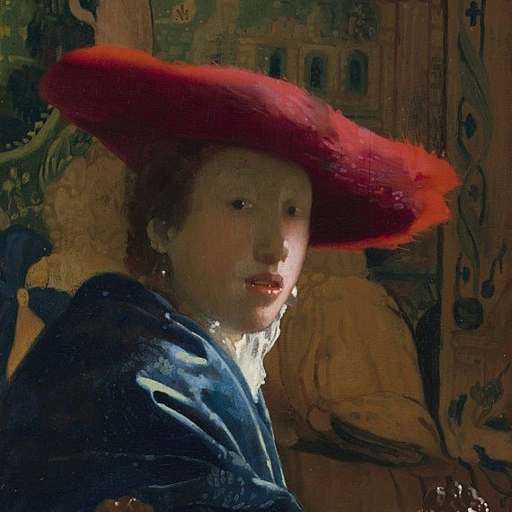

In [3]:
guide_image = "imgs/red_hat.jpg"
filter = FGD(model, guide_image)
print(filter)
Image.open(guide_image).resize((512,512))

**Step 3 (final step!):** Generate your image! This is done by passing in the FGD instance into the model function call with 
```
img = model.generate_FGD(filter)
```
which returns a PIL image as shown in the example below:

  0%|          | 0/50 [00:00<?, ?it/s]

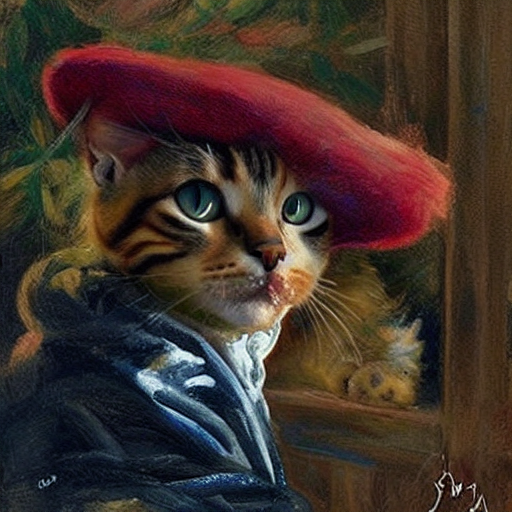

In [4]:
model.generate_FGD(filter)

## Additional Info and Optional Uses

**Variation:** Although we use non-deterministic sampling, the seeding is always fixed for reproducibility. For varying results, an optional second parameter specifying the random seed for sampling as an integer can also be provided: 
```
img = model.generate(filter, seed=seed)
```
For maximum variation, we also recommend reseting the inital latents with a different random seed beforehand:
```
model.initialize_latents_random(seed)
```

  0%|          | 0/50 [00:00<?, ?it/s]

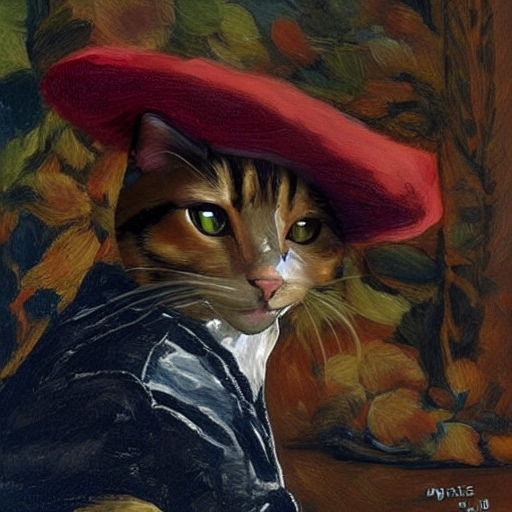

In [5]:
seed = 4
model.initialize_latents_random(seed)
model.generate_FGD(filter, seed=seed)

**No FGD:** For convenience, base stable diffusion can also be called without FGD using the same model as a comparsion with
```
img = model.generate()
```
as shown in the following example:

  0%|          | 0/50 [00:00<?, ?it/s]

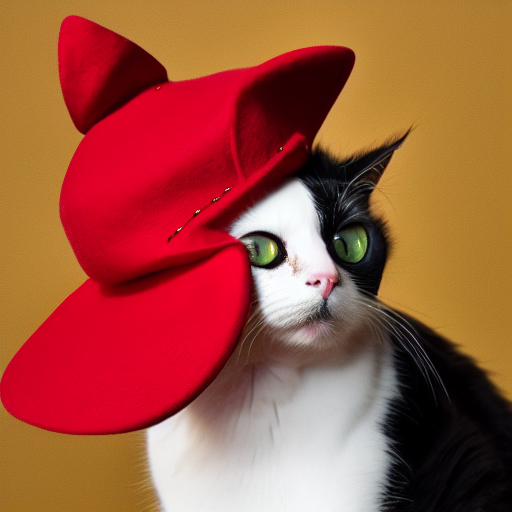

In [6]:
model.generate()